In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
import tensorflow as tf

In [51]:
df=pd.read_csv(r"C:\Users\HP\Downloads\movie.csv\movie.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
df.shape

(40000, 2)

In [4]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
df.duplicated().any()

True

In [6]:
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [9]:
df.shape

(39723, 2)

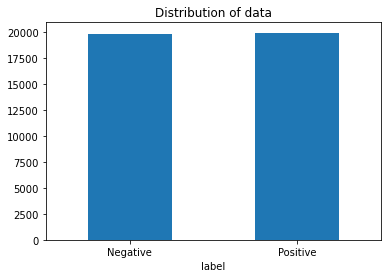

In [10]:
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax = ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [11]:
df['label'].value_counts()

1    19908
0    19815
Name: label, dtype: int64

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten,Conv1D, GlobalMaxPooling1D, Dense, LSTM
from tensorflow.keras.activations import relu, sigmoid

In [13]:
def preprocess_text(text):
    """function that take text input and apply below operation to clean the text.
    1. removing special characters
    2. create token from the text input and get lowercase
    3. remove stopwords as per NLTK stopwords library
    4. using PorterStemmer for stemming the token
    5. combine all tokens back to text 
    6. return the processed text"""
    
    text = re.sub(r'<[^>]+>', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [PorterStemmer().stem(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text.lower()

df['text'] = df['text'].apply(preprocess_text)

In [14]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

In [36]:
# Tokenization and padding
max_words = 3000  #tokenizer will consider only the top 1000 most frequent words in the training data 
max_seq_length = 100  #maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['text'])

X_train = tokenizer.texts_to_sequences(train_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])
vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, maxlen=max_seq_length, padding = 'post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

y_train = np.array(train_df['label'])
y_test = np.array(test_df['label'])

CNN MODEL

In [16]:
# Build the CNN model
embedding_dim = 200

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=5, activation=relu))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Accuracy:", test_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 172449 (673.63 KB)
Trainable params: 172449 (673.63 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [27]:
test_predictions=model.predict(X_test)
binary_predictions = (test_predictions > 0.5).astype(int)

621/621 [==============================] - 5s 8ms/step


In [28]:
binary_predictions

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [30]:
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Print model summary
print("\nModel Summary:")
model.summary()

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9954
           1       0.85      0.87      0.86      9908

    accuracy                           0.86     19862
   macro avg       0.86      0.86      0.86     19862
weighted avg       0.86      0.86      0.86     19862


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)      

In [33]:
test_df['predictions']=binary_predictions

In [34]:
test_df.head()

,text,label,predictions
1670,similar ray lawrenc 's `` jindabyn '' last mov...,0,1
39422,hammer hous horror : witch time set rural engl...,1,1
5662,great cast movi . time excel mani clever lines...,1,1
36119,never read bradburi novel movi base 've gather...,0,0
32160,"enjoy film . humor , poignant look famili , ob...",1,1


RNN MODEL

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, LSTM


# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
rnn_model.add(SimpleRNN(128, activation='relu'))


rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the RNN model on the test set
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test, batch_size=batch_size)
print("RNN Test Accuracy:", rnn_test_accuracy)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          5394800   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5432433 (20.72 MB)
Trainable params: 5432433 (20.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
497/497 [==============================] - 50s 95ms/step - loss: 0.6803 - accuracy: 0.5385 - val_loss: 0.6545 - val_accuracy: 0.5583
Ep

In [55]:
test_predictions=rnn_model.predict(X_test)
binary_predictions_r = (test_predictions > 0.5).astype(int)

621/621 [==============================] - 8s 13ms/step


In [56]:
print("Classification Report:")
print(classification_report(y_test, binary_predictions_r))

# Print model summary
print("\nModel Summary:")
model.summary()

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.26      0.38      9954
           1       0.55      0.89      0.68      9908

    accuracy                           0.57     19862
   macro avg       0.62      0.58      0.53     19862
weighted avg       0.62      0.57      0.53     19862


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)      

In [57]:
test_df['predictions_rnn']=binary_predictions
test_df.head()

,text,label,predictions,predictions_rnn
1670,similar ray lawrenc 's `` jindabyn '' last mov...,0,1,1
39422,hammer hous horror : witch time set rural engl...,1,1,0
5662,great cast movi . time excel mani clever lines...,1,1,1
36119,never read bradburi novel movi base 've gather...,0,0,1
32160,"enjoy film . humor , poignant look famili , ob...",1,1,1
